In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [234]:
hk_df=pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [235]:
hk_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [236]:
hk_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [237]:
hk_df.isna().sum()


Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [238]:
## we decided to drop this column because had many values missing
def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace = True)
    return df
drop_column(hk_df,'Vehicle Type')

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [239]:
hk_df['State'] = hk_df['State'].fillna('Unknown')

In [240]:
hk_df['Response'] = hk_df['Response'].fillna('Unknown')

In [241]:
hk_df['Vehicle Class'] = hk_df['Vehicle Class'].fillna('Unknown')

In [242]:
hk_df['Vehicle Size'] = hk_df['Vehicle Size'].fillna('Unknown')

In [243]:
hk_df.isna().sum()


Unnamed: 0                         0
Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [244]:
def replace_null_mean(df_columns):
    df_columns = df_columns.fillna(df_columns.mean())
    return df_columns


In [245]:
replace_null_mean(hk_df['Number of Open Complaints'])

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.384256
           ...   
10905    0.384256
10906    0.000000
10907    0.000000
10908    4.000000
10909    0.000000
Name: Number of Open Complaints, Length: 10910, dtype: float64

In [246]:
hk_df.isna().sum()


Unnamed: 0                         0
Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [247]:
mean_number_compains = round(hk_df["Number of Open Complaints"].median(),1)

In [248]:
hk_df["Number of Open Complaints"] = hk_df["Number of Open Complaints"].fillna(mean_number_compains)

In [249]:
hk_df.isna().sum()


Unnamed: 0                         0
Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints          0
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [250]:
median_number_months_claim = round(hk_df["Months Since Last Claim"].median(),1)

In [251]:
hk_df["Months Since Last Claim"] = hk_df["Months Since Last Claim"].fillna(median_number_months_claim)

In [252]:
hk_df.isna().sum()


Unnamed: 0                       0
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [253]:
## X-y split.

X=hk_df.drop('Total Claim Amount', axis=1)
y=hk_df['Total Claim Amount']

In [254]:
X=X._get_numeric_data()
X

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0,4809.216960,48029,61,7.0,52,0.0,9
1,1,2228.525238,0,64,3.0,26,0.0,1
2,2,14947.917300,22139,100,34.0,31,0.0,2
3,3,22332.439460,49078,97,10.0,3,0.0,2
4,4,9025.067525,23675,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,14.0,40,0.0,7
10906,10906,5259.444853,61146,65,7.0,68,0.0,6
10907,10907,23893.304100,39837,201,11.0,63,0.0,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly Premium Auto'}>,
        <AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>],
       [<AxesSubplot:title={'center':'Number of Open Complaints'}>,
        <AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>]], dtype=object)

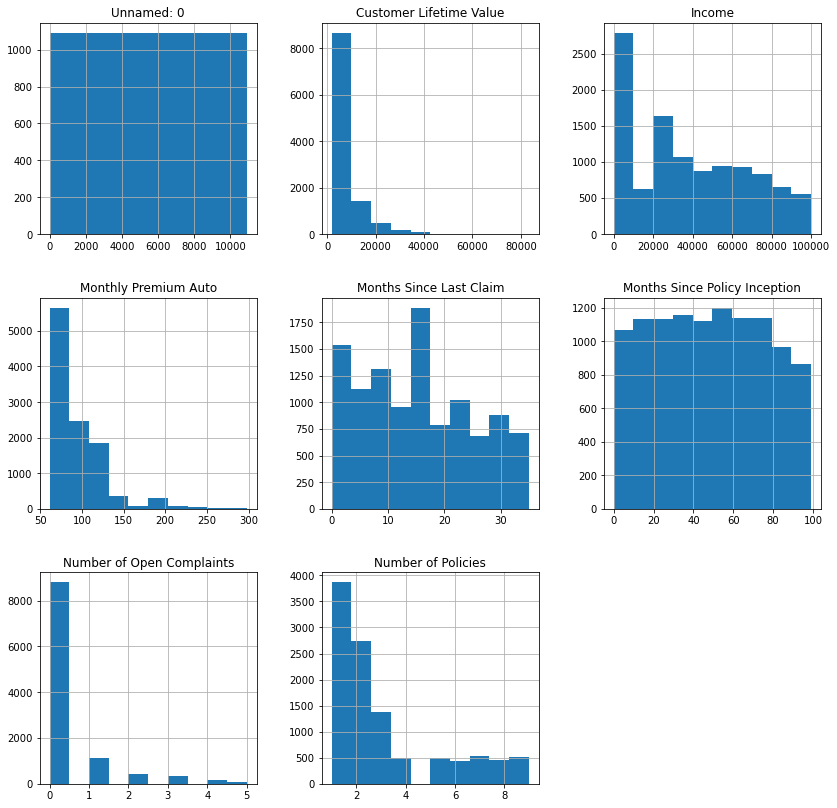

In [255]:
X.hist(figsize=(14,14))

/Users/barbaracamean/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


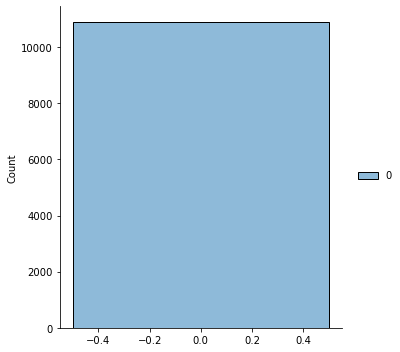

In [256]:
pt = PowerTransformer()
med_home_val_transformed=pt.fit_transform(hk_df['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(med_home_val_transformed)

In [257]:
## wth powertransform we did not get the normal distribution
## minMax Scaler is not useful to find the normal distribution
## We could use only quantile transform or std_scaler

std_scaler=StandardScaler().fit(X) 

X_scaled=std_scaler.transform(X)

In [258]:
print(X_scaled)

[[-1.73189206 -0.46610505  0.34563485 ...  0.13987654 -0.4066559
   2.50945468]
 [-1.73157454 -0.84094593 -1.23646244 ... -0.79070911 -0.4066559
  -0.82492205]
 [-1.73125702  1.00652314 -0.50719362 ... -0.61175033 -0.4066559
  -0.40812496]
 ...
 [ 1.73125702  2.30582467  0.07578661 ...  0.53358586 -0.4066559
  -0.40812496]
 [ 1.73157454  0.5742732   0.87815031 ... -0.75491735  4.08725734
   1.25906341]
 [ 1.73189206 -0.16859268 -1.23646244 ... -1.685503   -0.4066559
   0.00867213]]


In [259]:
## Asign it back to the dataframe and then check the distribution again

In [260]:
##One Hot/Label Encoding (categorical).
categoricals_features= hk_df.select_dtypes("object")
categoricals_features

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [261]:
state_dummy =pd.get_dummies(categoricals_features["State"], drop_first=True)

In [262]:
response_dummy =pd.get_dummies(categoricals_features["Response"], drop_first=True)

In [263]:
coverage_dummy =pd.get_dummies(categoricals_features["Coverage"], drop_first=True)

In [264]:
education_dummy =pd.get_dummies(categoricals_features["Education"], drop_first=True)


In [266]:
## use this function to join all the categorical features in the table again
categoricals_features = pd.concat([categorical_features, pd.get_dummies(categoricals_features["Coverage"],prefix='coverage')],axis=1)




NameError: name 'categorical_features' is not defined